# 1.几何对象的实例化：

In [1]:
from shapely import Point
from shapely import LineString
from shapely import Polygon

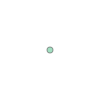

In [2]:
# 点的实例化
point = Point(0, 0)
point

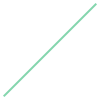

In [3]:
# 线的实例化
line  = LineString([(0, 0), (1, 1)])
line 

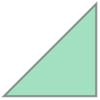

In [4]:
# 面的实例化
polygon = Polygon([(0, 0), (1, 1), (1, 0)])
polygon

### Shapely是一个平面几何库，在几何分析中忽略了z。在构造实例时可以使用第三维 Z 坐标值，但对几何分析没有影响。

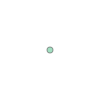

In [5]:
# 三维点的实例化
point = Point(0, 0 , 1)
point

### 在所有的构造函数中，数字值会被转换为float浮点类型。换句话说，Point(0, 0)和Point(0.0, 0.0)会产生等同的几何实例。Shapely在构造实例时不检查其拓扑结构的有效性，因为在大多数情况下是不必要的。可以使用 :attr:is_valid 谓词对几何实例的有效性进行验证。

In [6]:
Point(0, 0) == Point(0.0, 0.0)

True

# 2.Shapely中的几何对象通用的属性和方法：

In [7]:
point = Point(0, 0)
line  = LineString([(0, 0), (1, 1)])
polygon = Polygon([(0, 0), (1, 1), (1, 0)])

### object.area ——  返回几何对象的面积（浮点类型）。

In [8]:
point.area , line.area , polygon.area

(0.0, 0.0, 0.5)

### object.length —— 返回几何对象的长度（浮点类型）。

In [9]:
point.length , line.length , polygon.length

(0.0, 1.4142135623730951, 3.414213562373095)

### object.bounds —— 返回一个表示几何对象边界的元祖(minx, miny, maxx, maxy)，即最小外包矩形。

In [10]:
point.bounds , line.bounds , polygon.bounds

((0.0, 0.0, 0.0, 0.0), (0.0, 0.0, 1.0, 1.0), (0.0, 0.0, 1.0, 1.0))

### object.minimum_clearance —— 返回一个节点被移动以产生一个无效的几何形状的最小距离。这可以被认为是衡量一个几何体稳健性的标准，较大的最小间隙值表明一个更稳健的几何体。如果一个几何体不存在最小间隙，例如一个点，这将返回math.infinity。

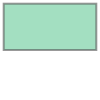

In [11]:
polygon = Polygon([(0, 0), (2, 0), (2, 1), (0, 1), (0, 0)])
polygon

In [12]:
polygon.minimum_clearance # 结果为长方形的短边长度

1.0

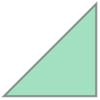

In [13]:
polygon2 = Polygon([(0, 0), (1, 1), (1, 0)])
polygon2

In [14]:
polygon2.minimum_clearance # 结果为三角形中长边垂线段的长度值

0.7071067811865476

In [15]:
# 点将返回math.infinity
point = Point(0, 0)
point.minimum_clearance

inf

In [16]:
 # 结果我线段长度
line  = LineString([(0, 0), (1, 1)])
line.minimum_clearance

1.4142135623730951

### object.geom_type —— 返回一个字符串，根据OpenGIS的格式标准指定对象的几何类型。

In [17]:
point.geom_type

'Point'

In [18]:
line.geom_type

'LineString'

In [19]:
polygon.geom_type

'Polygon'

### object.distance(other) —— 返回该几何对象到其他几何对象的最小距离（浮点类型）。

In [20]:
Point(0,0).distance(Point(1,1))

1.4142135623730951

### object.hausdorff_distance(other) —— 返回该几何对象到另一个几何对象的Hausdorff距离（浮点数）。两个几何对象之间的Hausdorff距离（豪斯多夫距离，集合之间的距离度量）是任何一个几何对象上的一个点与另一个几何对象上的最近点之间的最远距离。

In [21]:
point = Point(1, 1)
line = LineString([(2, 0), (2, 4), (3, 4)])

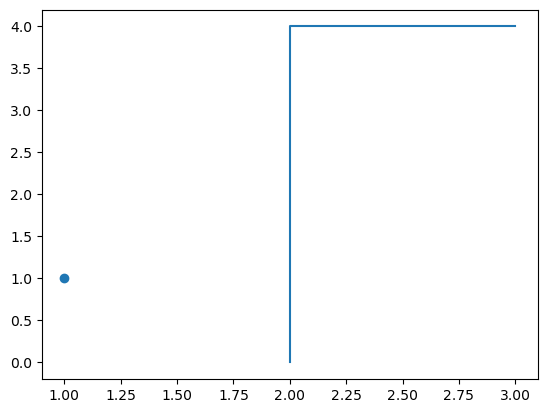

In [22]:
import matplotlib.pyplot as plt

plt.plot([2,2,3] , [0,4,4])
plt.scatter(1,1)

In [23]:
point.hausdorff_distance(line)

3.605551275463989

In [24]:
point.distance(Point(3, 4))

3.605551275463989

### object.representative_point() —— 返回一个在几何对象内的点。该点为标记点，在计算时依照计算量最小而定，至确保在几何对象内部，并不代表几何对象的质心。

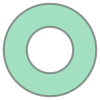

In [25]:
donut = Point(0, 0).buffer(2.0).difference(Point(0, 0).buffer(1.0))
donut

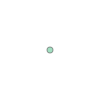

In [26]:
# 几何对象的质心
donut.centroid

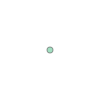

In [27]:
donut.representative_point() 

Text(0.8, 0.3, 'representative_point')

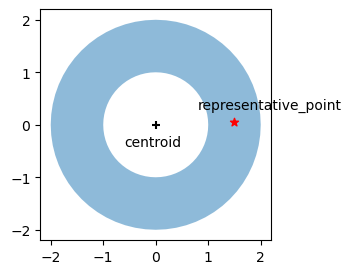

In [28]:
import geopandas as gpd

f ,ax = plt.subplots(figsize=(3,3))

gpd.GeoDataFrame([donut] , columns=["geometry"]).plot(ax=ax,alpha=0.5)
ax.scatter(donut.centroid.x , donut.centroid.y,color="black",marker="+") # centroid
ax.scatter(donut.representative_point() .x , donut.representative_point() .y,color="red",marker="*") # representative_point() 

ax.text(-0.6, -0.4, r'centroid', fontsize=10)
ax.text(0.8, 0.3, r'representative_point', fontsize=10)